# Moving Average process demo


In [1]:
import numpy as np
import matplotlib.pyplot as plt

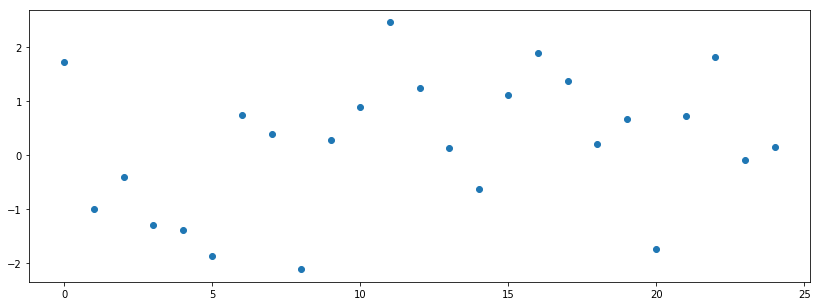

In [16]:
std_eps=1.3

# Define number of time steps
N=25

# Generate a time series of white noise with mean 0 and standard deviation std_eps
np.random.seed(24)
eps_t = np.random.normal(0.0, std_eps, N)

# Plot the time series of white noise
plt.figure(figsize=(14,5))
plt.plot(eps_t,'o')
plt.show()

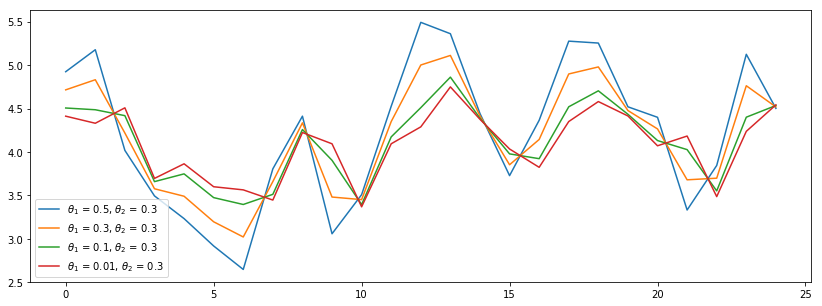

In [26]:
# Define parameters of the Moving Average process of order 2 (MA(2))
mu=4.0
theta1=[0.5,0.3,0.1,0.01]
theta2=[0.3,0.3,0.3,0.3]

# Create a storage container for our Moving average process
Z_t = np.zeros((N,4))
T   = np.arange(0,N,1)

# Create the values of the noise process at timesteps t-1 and t-2 to initiate the model
eps_tm1 = np.random.normal(0.0, std_eps, 1)
eps_tm2 = np.random.normal(0.0, std_eps, 1)

plt.figure(figsize=(14,5))

for i in np.arange(0,4,1):
    for t in T:
        if t==0:
            Z_t[t] = mu + theta1[i]*eps_tm1 + theta2[i]*eps_tm2
        if t==1:
            Z_t[t] = mu + theta1[i]*eps_t[t-1] + theta2[i]*eps_tm1
        if t>1:
            Z_t[t] = mu + theta1[i]*eps_t[t-1] + theta2[i]*eps_t[t-2]        

    Zlabel=r"$\theta_1$ = "+str(theta1[i])+r", $\theta_2$ = "+str(theta2[i])
    plt.plot(T,Z_t[:,i],label=Zlabel)

# Plot the resulting time series
plt.legend()
plt.show()